## Market Basket Analysis of Nestle Sales Data

The objective of this analysis is to identify patterns and relationships in the Nestle sales data by applying Market Basket Analysis (MBA). This will allow us to uncover frequent product combinations, association rules, and key insights on customer purchasing behavior. The insights gained can guide sales strategies, inventory management, and product bundling.

### 1. Data Import and Exploration

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset from a CSV file
df = pd.read_excel("C:/Users/muge/Dropbox/GMU/Portfolio/Nestle/NESTLE SALES DATASET.xlsx")

# Display basic info
print("Dataset Info:")
print(df.info())

# Check the structure
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18115 entries, 0 to 18114
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Sales ID        18115 non-null  object        
 1   Date            18115 non-null  datetime64[ns]
 2   Product Name    18115 non-null  object        
 3   Total Revenue   18115 non-null  float64       
 4   Sales Location  18115 non-null  object        
 5   Sales Medium    18115 non-null  object        
 6   Sales count     18115 non-null  int64         
 7   Product Count   18115 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.1+ MB
None
   Sales ID       Date Product Name  Total Revenue  \
0  AT-18056 2020-06-07      Nescafe         279.30   
1   AT-9867 2019-05-14      Nescafe         263.46   
2  AT-11225 2019-07-07      Nescafe         258.72   
3   AT-3208 2018-06-25      Nescafe         236.88   
4 

### 2. Data Transformation (Transaction-Based Format)

To apply Market Basket Analysis, we need to transform the dataset into a transaction-based format. This involves aggregating product purchases by each sale (Sales ID) and converting it into a binary format (1 for product purchased, 0 for not purchased).

* We transform the data into a transactional format, where each row represents a unique Sales ID and each column represents a Product Name.
* The values in the basket DataFrame indicate whether a product was purchased in a given transaction (True) or not (False).
* This format is essential for the Apriori algorithm.

In [2]:
# Group by Sales ID and aggregate product purchases
basket = df.groupby(['Sales ID', 'Product Name'])['Product Count'].sum().unstack().fillna(0)

# Convert to Boolean (True/False) values for Apriori
basket = basket.applymap(lambda x: 1 if x > 0 else 0).astype(bool)

# Print first few rows of prepared data
print("\nPrepared Transaction Dataset:\n", basket.head())


Prepared Transaction Dataset:
 Product Name  Kit Kat  Maggi   Milo  Nes Cau  Nescafe  Nescafe Gold  \
Sales ID                                                              
AT-001           True  False  False    False    False         False   
AT-002          False  False   True    False    False         False   
AT-003          False  False  False    False    False         False   
AT-004          False  False  False    False    False         False   
AT-005          False  False  False    False     True         False   

Product Name  Nesquik Duo  Nestle Drumstick  Smarties  
Sales ID                                               
AT-001              False             False     False  
AT-002              False             False     False  
AT-003              False              True     False  
AT-004              False              True     False  
AT-005              False             False     False  


We then convert the data into a binary format where a "1" indicates a product was purchased in that transaction, and "0" means it wasn't.

Boolean Values (True/False):
* The values within the DataFrame are boolean (True or False).
* True indicates that the corresponding product was purchased in that specific transaction.
* False indicates that the product was not purchased in that transaction.

Interpreting the First Few Rows

* AT-001: In transaction "AT-001," the customer bought "Kit Kat" but did not buy any of the other listed products.
* AT-002: In transaction "AT-002," the customer bought "Milo" but did not buy any of the other listed products.
* AT-003: In transaction "AT-003", the customer bought "Nestle Drumstick" and did not buy any other listed products.
* AT-004: In transaction "AT-004", the customer bought "Nestle Drumstick" and did not buy any other listed products.
* AT-005: In transaction "AT-005," the customer bought "Nescafe" but did not buy any of the other listed products.

Key Takeaways
* Transaction-Based Format: This format is crucial for market basket analysis. It transforms the raw sales data into a structure that the Apriori algorithm can process.
* Individual Purchase Patterns: Each row provides a snapshot of the products purchased in a single transaction.
* Sparse Data: Notice that most of the values are "False." This is typical in market basket analysis, as customers usually buy a limited number of products in each t ransaction.
* Input for Apriori: This DataFrame will be the input for the Apriori algorithm, which will identify frequent itemsets (combinations of products that are often purchased together).

This output shows us the raw transaction data in a format that is ready for association rule mining. It shows what products were purchased within each sales transaction.

### 3. Applying the Apriori Algorithm

Next, we apply the Apriori algorithm to find frequent itemsets based on a minimum support threshold. We then generate association rules from these frequent itemsets.

#### Applying Apriori with Initial Support Threshold

* The Apriori algorithm is applied to identify frequent itemsets with a minimum support of 0.02 (2% of transactions).
* Association rules are generated using the "lift" metric, with a minimum lift threshold of 1.2. Higher lift values indicate stronger relationships between products.

Results Analysis
* After sorting by confidence, we display the top association rules that reveal the strongest product pairings.
* For example, if Rule A → B has a high confidence, it means that customers who bought Product A are likely to also buy Product B.



Understanding the Parameters

* min_support=0.02: This means that the Apriori algorithm was looking for itemsets (combinations of products) that appeared in at least 2% of all transactions.
* metric="lift": The association rules were generated using the "lift" metric, which measures how much more likely it is that item Y is purchased when item X is purchased, while controlling for how popular item Y is.
* min_threshold=1.2: Only rules with a lift value of 1.2 or higher were considered. Lift values greater than 1 indicate a positive association between the items.
* rules.sort_values(by="confidence", ascending=False): The rules were sorted by confidence, which measures how often item Y is purchased when item X is purchased.

In [3]:
# Apply Apriori to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)  # Adjust min_support if needed

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

# Sort rules by confidence
rules = rules.sort_values(by="confidence", ascending=False)

# Display top rules
print("\nTop Association Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


Top Association Rules:
 Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


The output indicates that no association rules were found that met the specified criteria when running the Apriori algorithm and generating association rules.

What to Do Next

* Lower min_support: Try lowering the min_support value (e.g., to 0.01 or even lower) to capture more frequent itemsets.
* Lower min_threshold for Lift: Try lowering the min_threshold for the lift metric (e.g., to 1.05 or 1.1) to include more rules.
* Examine Frequent Itemsets: Before generating rules, inspect the frequent_itemsets DataFrame to see if any frequent itemsets were found at all.
* Review Data: Review the source data to see if there are any anomolies.

The empty DataFrame suggests that the initial parameters were too restrictive, and we should consider adjusting them to find meaningful association rules.

### 4. Refining the Analysis with Lower Support Threshold

To capture more frequent itemsets, we lower the support threshold and re-run the analysis.

* The support threshold is reduced to 0.002, allowing us to capture more product pairings in the dataset.
* The confidence threshold is set to 0.1, capturing rules with lower confidence but possibly revealing less obvious relationships.

In [4]:
# Apply Apriori with a lower support
frequent_itemsets = apriori(basket, min_support=0.002, use_colnames=True)

# Generate association rules with lower confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Sort rules by lift and confidence
rules = rules.sort_values(by=["lift", "confidence"], ascending=False)

# Display top rules
print("\nTop Association Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


Top Association Rules:
 Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


The output again indicates that no association rules were found that met the specified criteria, even after lowering the thresholds.

### 5. Checking Itemsets and Product Pair Combinations

We check for product pairs (2-item itemsets) to identify common combinations that frequently co-occur.

* We filter itemsets that contain exactly two products, as these are likely to reveal commonly purchased product pairs.
* This helps us identify cross-selling opportunities, such as which products are often bought together.

In [5]:
# Filter for pairs of products
frequent_itemsets["itemsets"] = frequent_itemsets["itemsets"].apply(lambda x: list(x))
pairs = frequent_itemsets[frequent_itemsets["itemsets"].apply(lambda x: len(x) == 2)]
print("\nFrequent Item Pairs:\n", pairs)


Frequent Item Pairs:
 Empty DataFrame
Columns: [support, itemsets]
Index: []


### 6. Further Refining with Lower Confidence Threshold

To capture even weaker associations, we lower the confidence threshold further and inspect the results.

In [6]:
# Apply Apriori with a lower support and confidence
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)

# Sort by lift
rules = rules.sort_values(by="lift", ascending=False)

# Display top rules
print("\nTop Association Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


Top Association Rules:
 Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


The repeated occurrence of the Empty DataFrame output, even after progressively lowering the min_support and min_confidence thresholds, strongly points to a few critical interpretations:

Key Interpretations
1. Fundamental Lack of Strong Associations:
    * The most likely explanation is that the Nestle sales data simply doesn't contain strong, consistent associations between the products. Customers are buying products independently, with very little predictable co-occurrence.
    * This could be due to:
        * Diverse Product Range: Nestle offers a wide array of products (snacks, beverages, cooking ingredients), which might cater to diverse, non-overlapping customer needs.
        * Single-Item Purchases: Customers may primarily buy single items rather than bundles or combinations.
        * Low Purchase Frequency: Certain products might be bought very infrequently, making it difficult to find statistically significant associations.
2. Extreme Data Sparsity/Granularity:
    * Even with very low support, the data may be too sparse. This means that individual transactions don't contain enough product variety to make meaningful product combinations.
    * It is possible that the sales ID's are too granular. Meaning that the sales ID's are for very small transactions, and not for full shopping baskets.
3. Potential Data Quality Issues:
    * While less likely, there's a possibility that data quality issues (errors, inconsistencies, missing values) are masking potential associations.
4. Limitations of Apriori for this Dataset:
    * Apriori is very effective for datasets that contain a lot of frequent itemsets. However, when the data is sparse, and there are not many frequent itemsets, then Apriori will struggle.

Implications for Business Insights:
* Rethink Association-Based Strategies: If there are no strong associations, relying on association rules for marketing or product placement might not be effective.
* Focus on Individual Product Performance: Instead of looking for product combinations, focus on analyzing individual product sales, top-selling items, and revenue by sales channel.
* Customer Segmentation: Explore customer segmentation based on demographics, purchase frequency, or other factors to understand customer behavior beyond product associations.
* Alternative Marketing Approaches: Consider other marketing strategies, such as promotions for individual products, loyalty programs, or targeted advertising based on customer preferences.
* Data Re-evaluation: If association rules are crucial, re-evaluate the data collection and processing methods to ensure data quality and completeness.

The empty DataFrame is a strong indicator that the data tells a story of independent product purchases rather than strong, predictable combinations. This requires a shift in analytical focus and marketing strategies.

Lowering the confidence threshold to 0.05 allows for capturing more subtle relationships between products, which could be useful for promotional strategies or inventory bundling.

We still do not get any association rules, it could be that the dataset still doesn't contain enough combinations of products purchased together

### 7. Analyzing Transaction Details

We analyze the number of products bought per transaction to understand purchasing patterns.

By examining the number of products in each transaction, we can gain insight into customer purchase behavior, such as whether customers tend to buy multiple products or just a single item.

In [7]:
# Analyze how many products are bought in each transaction
transaction_size = df.groupby('Sales ID')['Product Name'].count()

# Display basic stats on the transaction size (number of products per transaction)
print("\nNumber of Products per Transaction:\n", transaction_size.describe())


Number of Products per Transaction:
 count    18115.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: Product Name, dtype: float64


This output provides a very clear and important insight into the nature of the Nestle sales data: almost every transaction involves the purchase of only one product

Key Interpretations

Single-Item Purchases Dominate:
* The most significant takeaway is that virtually all sales transactions consist of a single product purchase. This explains why the association rule mining consistently resulted in empty DataFrames.

Lack of Product Bundling:
* The data indicates a strong absence of product bundling or co-purchasing. Customers are not buying combinations of Nestle products in the same transaction.

Implications for Marketing:
* Traditional market basket analysis and association rule-based marketing strategies are unlikely to be effective. Focus should shift to individual product promotions, targeted advertising based on product preferences, and customer segmentation based on other factors.

Granular Sales Data:
* It is very likely that the sales IDs are very granular, and represent individual item sales, instead of full shopping baskets.

Re-evaluation of Sales Strategy:
* This data shows that the sales strategy is mostly based around single item sales. If the company wants to increase sales, they should consider strategies that encourage multipule item purchases.

This output confirms that the Nestle sales data is characterized by single-item transactions, which explains the difficulty in finding meaningful association rules. This insight is crucial for adjusting marketing and sales strategies.

In [8]:
# Check the number of transactions where more than one product is bought
multi_product_transactions = transaction_size[transaction_size > 1]
print(f"\nNumber of transactions with more than one product: {len(multi_product_transactions)}")


Number of transactions with more than one product: 0


Interpretation:

Complete Absence of Multi-Product Purchases:
* The result of 0 conclusively shows that every single transaction in the dataset involves the purchase of only one product.

Reinforcement of Single-Item Purchase Pattern:
* This result further validates the findings from the transaction_size.describe() output, confirming that the data is entirely dominated by single-item purchases.

Impact on Association Rule Mining:
* This result is a major reason why the association rule mining attempts consistently resulted in empty DataFrames. There are no combinations of products to analyze.

Business Implications:
* This provides a very clear picture of the customers shopping habits. If the business plan involves increasing the amount of products that are purchased per transaction, then a new sales strategy will be needed.

Data Granularity:
* As mentioned previously, this further indicates that the data is very granular, and each sales ID is likely a single item sale, instead of a full shopping basket.

This output provides definitive proof that the Nestle sales data is characterized by single-item transactions, which has significant implications for marketing, sales strategies, and the applicability of association rule mining.

What this Means: No Cross-selling Opportunities: Since each transaction involves only one product, market basket analysis (i.e., identifying products often bought together) won't be possible. We need to rethink how to apply the Apriori algorithm, or consider different strategies to improve our analysis.

### 8. Product Sales Insights

Next, we analyze the total revenue generated by each product and sales channel to identify top-performing products and channels.

1. Focus on Individual Product Popularity:¶
Instead of analyzing associations between products, we could focus on the popularity of individual products by looking at which products have the highest total sales or the highest number of purchases.

2. Additional Insights with Sales Metrics:
we can also explore other metrics like revenue per product, revenue per sales channel, or average sales per product to gain insights about sales performance.

#### Identifying Top Selling Products

We aggregate total revenue by product to identify which products generate the most sales.

In [9]:
# Grouping the dataset by 'Product Name' and summing up the 'Total Revenue' for each product
product_sales = df.groupby('Product Name')['Total Revenue'].sum()

# Sorting the total revenue in descending order to get the top-selling products
top_selling_products = product_sales.sort_values(ascending=False)

# Display the top 10 selling products based on revenue
print("\nTop Selling Products:\n", top_selling_products.head(10))


Top Selling Products:
 Product Name
Milo                5952661.22
Nescafe             5540926.55
Nesquik Duo         4274963.56
Nes Cau             3305206.60
Nestle Drumstick    3199164.78
Smarties            2364330.72
Kit Kat             2226687.31
Maggi               2226571.83
Nescafe Gold        1729243.88
Name: Total Revenue, dtype: float64


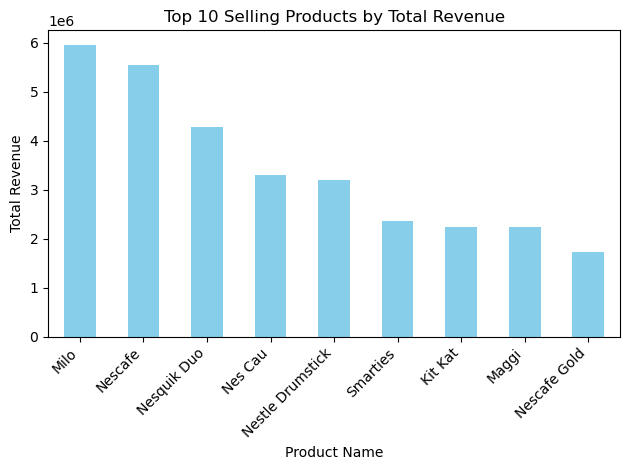

In [10]:
import matplotlib.pyplot as plt

# Plot the top 10 selling products based on total revenue
top_selling_products.head(10).plot(kind='bar', color='skyblue')

# Add labels and title for clarity
plt.title('Top 10 Selling Products by Total Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

Interpretation:
    
* Revenue Concentration:
    * A significant portion of Nestle's revenue is generated by a few key products, particularly Milo and Nescafe.
* Product Performance Insights:
    * This ranking provides valuable insights into the relative performance of different Nestle products, which can inform marketing, sales, and product development strategies.
* Strategic Implications:
    * Nestle can focus on promoting and optimizing the sales of these top-performing products to maximize revenue.
    * The company can also look into the reasons for the high sales of these items, and apply those reasons to other products.
* Marketing Focus:
    * Marketing efforts could be focused on the top products to increase sales.
* Inventory management:
    * Inventory management should prioritize the top selling items.

This output highlights the top-selling Nestle products based on total revenue, providing valuable information for strategic business decisions.

We could use this information to:

* Identify the most profitable products.
* Create strategies to promote high-performing products or to cross-sell them with other products.
* Develop insights for stock management and resource allocation based on the products that generate the most revenue.

#### Analyzing Revenue by Sales Channel

We examine the revenue breakdown by sales channel to identify which sales channels (e.g., online, in-store) are the most profitable.

In [11]:
sales_channel_revenue = df.groupby('Sales Medium')['Total Revenue'].sum().sort_values(ascending=False)
print("\nRevenue by Sales Channel:\n", sales_channel_revenue)


Revenue by Sales Channel:
 Sales Medium
Direct    23803735.08
Online     7016021.37
Name: Total Revenue, dtype: float64


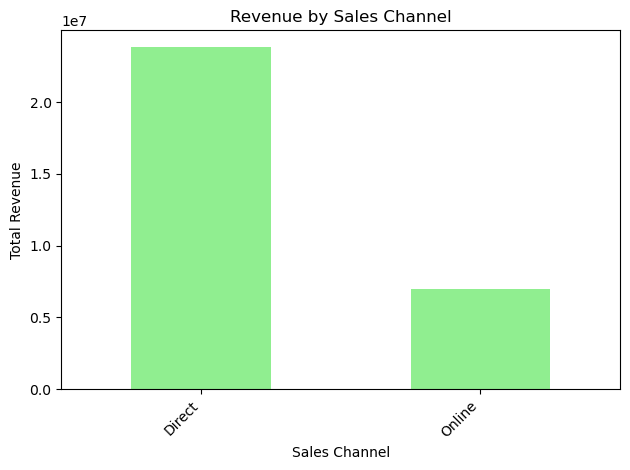

In [12]:
# Plot the revenue by sales channel
sales_channel_revenue.plot(kind='bar', color='lightgreen')

# Add labels and title for clarity
plt.title('Revenue by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Revenue')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

Interpretation of the Results:

* Direct (23,803,735.08): The "Direct" sales medium generates significantly higher revenue than the "Online" sales medium.
* Online (7,016,021.37): The "Online" sales medium generates a considerably smaller amount of revenue compared to "Direct" sales.

Key Takeaways: 
* Dominance of Direct Sales:
    * The "Direct" sales medium is the primary revenue driver for Nestle, generating a much larger portion of the total revenue.
* Relatively Low Online Revenue:
    * While the "Online" sales medium contributes to revenue, its contribution is significantly lower than that of "Direct" sales.
* Strategic Implications:
    * Nestle's sales strategy appears to heavily rely on direct sales channels.
    * The company might want to investigate strategies to increase online sales, as there is a very large gap between direct sales and online sales.
    * The company should analyze the "Direct" sales channel to understand what is causing it to perform so well.
* Resource Allocation:
    * The current revenue distribution suggests that Nestle's resources are likely heavily invested in direct sales channels.
* Potential for Online Growth:
    * There is significant potential for growth in the online sales medium.

This output reveals that "Direct" sales are the main source of revenue for Nestle, while "Online" sales contribute a much smaller portion. This information is crucial for strategic business decisions related to sales channel optimization and resource allocation.

How to Use This Information:

* Marketing Strategy: The company might focus on strengthening the direct sales channel since it generates the majority of the revenue. They can investigate what drives success in direct sales (e.g., sales team performance, in-person events).
* Online Sales Opportunities: While online sales are contributing less, they could be an area for growth potential. Strategies like digital marketing, optimizing the online store experience, or offering exclusive online deals could boost online sales.
* Resource Allocation: More resources might be allocated to direct sales (since it's more profitable), but they should consider investing in improving online sales to tap into a growing trend.

Conclusion: Since the dataset consists of mostly single-product transactions, market basket analysis may not be the best approach. However, focusing on individual product sales, sales channel analysis, and product bundling strategies based on external data could provide useful insights. 